# polynomial regeression

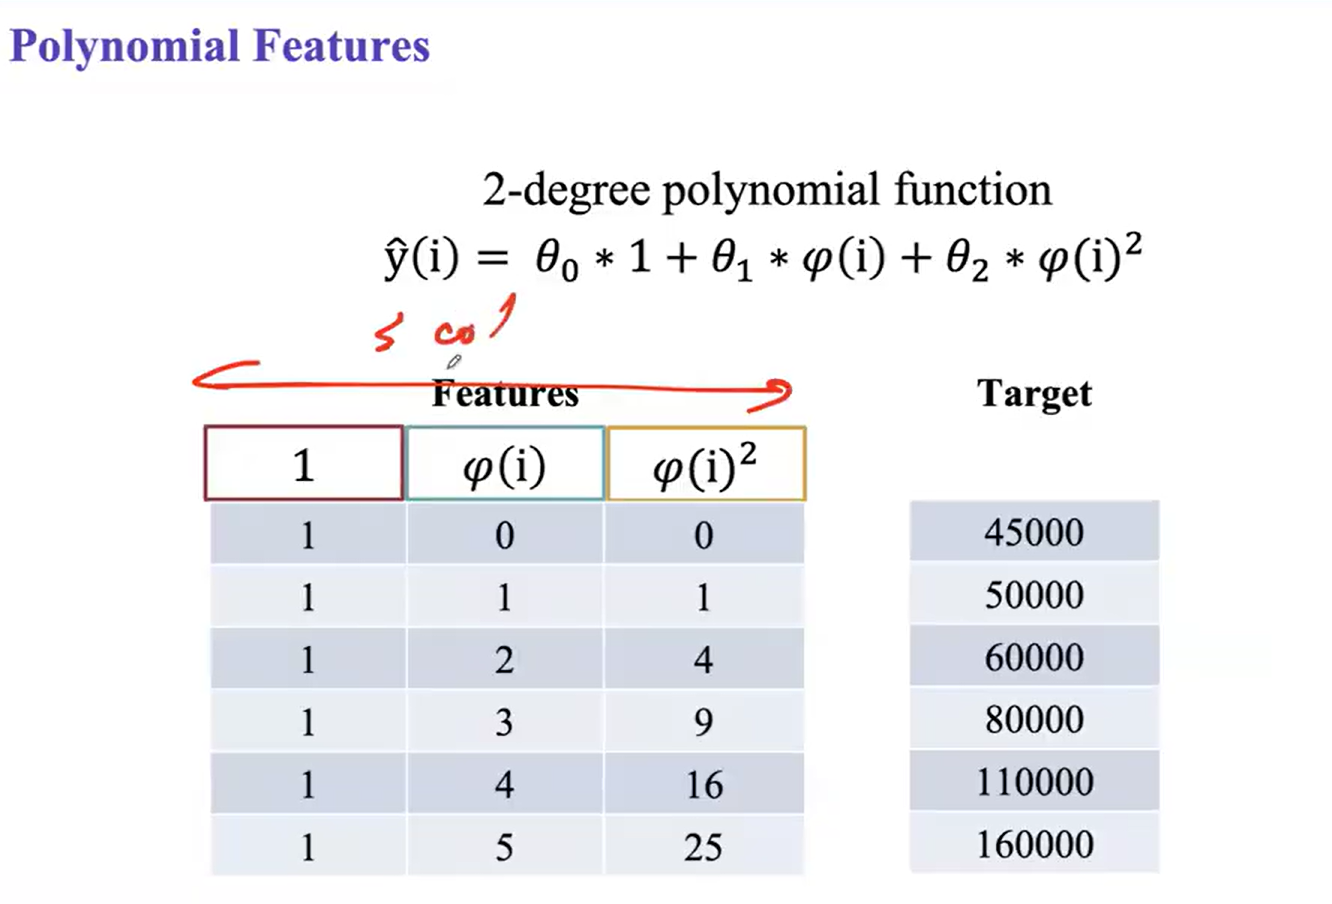

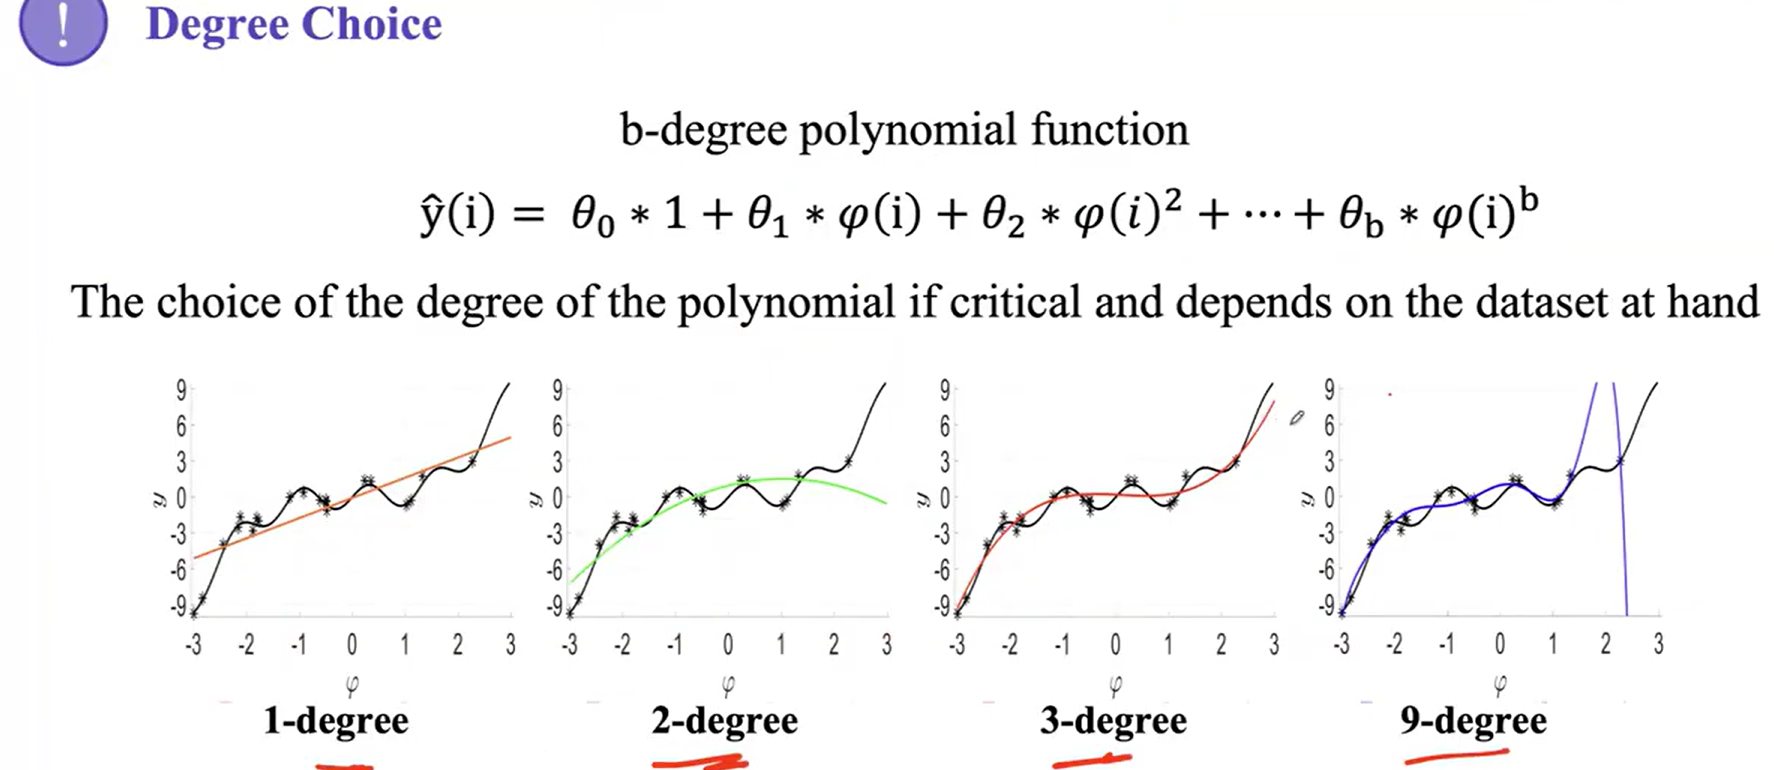

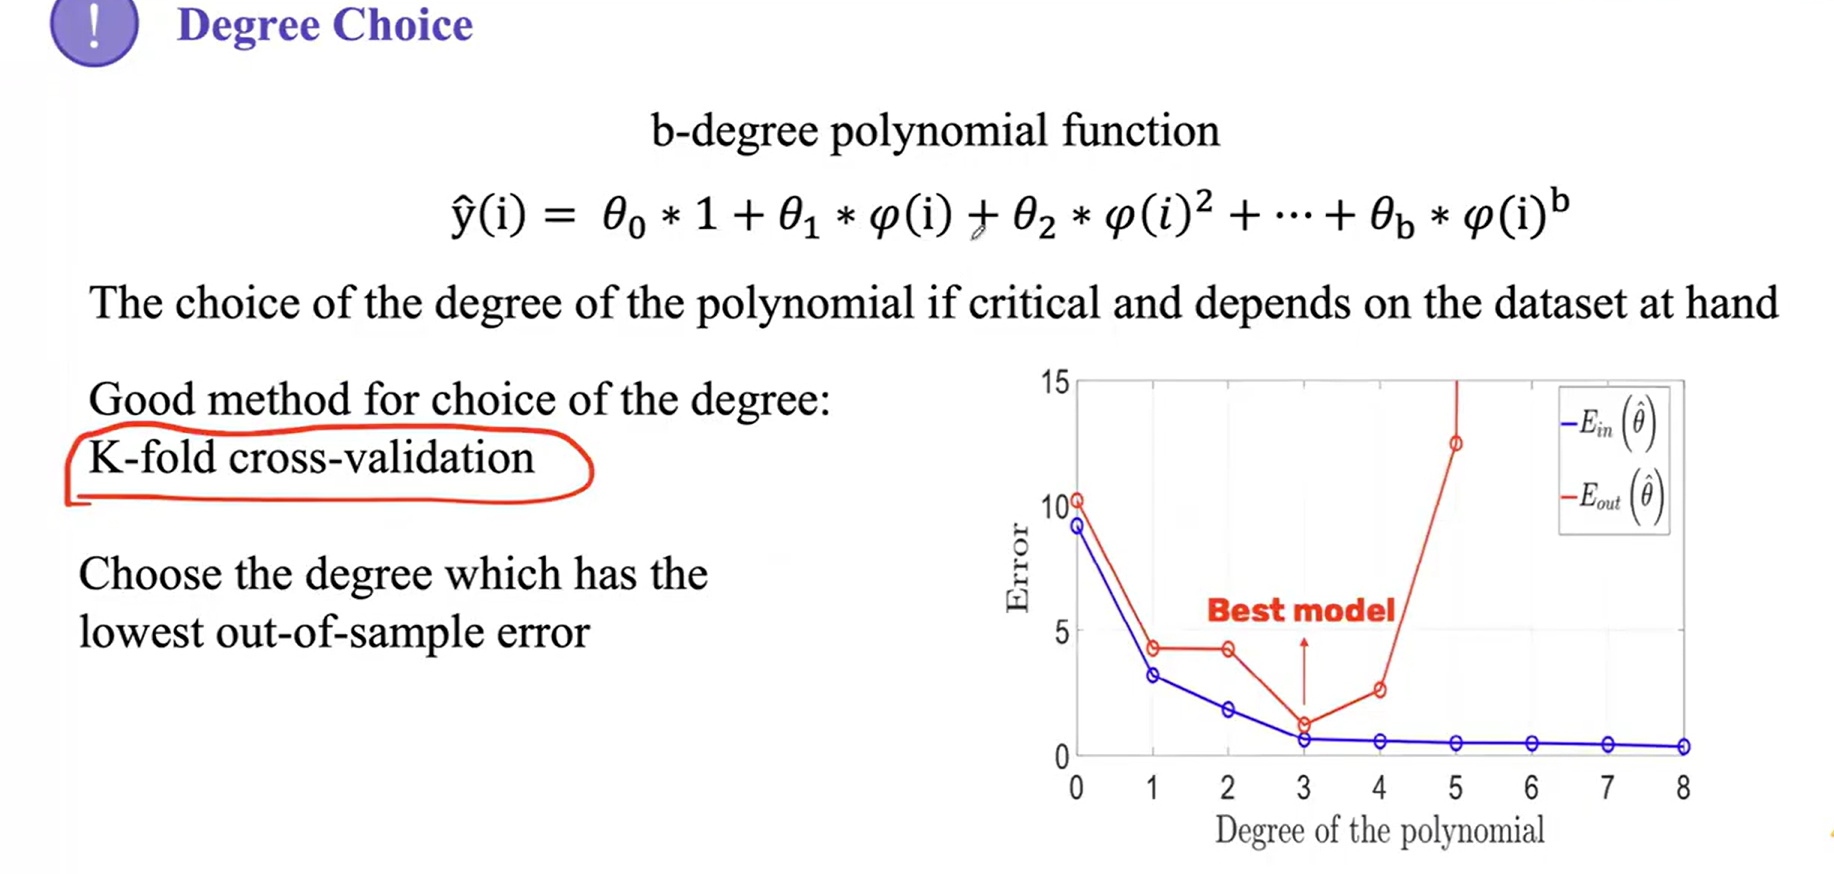

# Linear regression

## import libraries

```python

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## read dataset

In [261]:
df = pd.read_csv('Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [262]:
X = df.Level
X
print('X: \n', X)
y = df.Salary
print('y: \n', y)

X: 
 0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64
y: 
 0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


Text(0, 0.5, 'Salary')

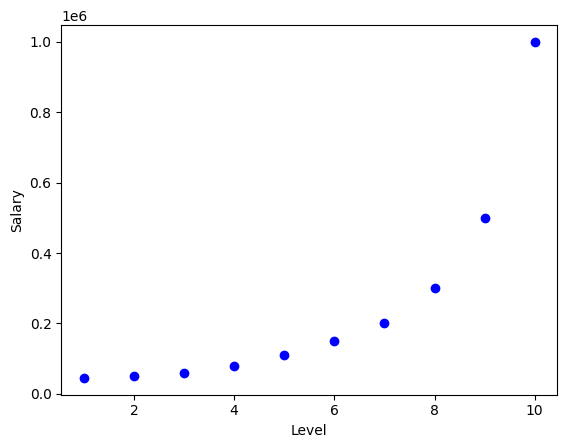

In [263]:
plt.scatter(X, y, color = 'b')
plt.xlabel('Level')
plt.ylabel('Salary')

## Linear Regression

In [264]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y)**2)
    tss = np.sum((y - y.mean())**2)
    return 1 - (rss/tss)

## đóng gói 

In [265]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs = 100):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        #initial coefficients
        self.theta = np.random.rand(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred - y_target)**2
        loss = np.mean(loss)
        return loss
    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred
    def fit(self):
        for epoch in range(self.num_epochs):
            y_pred = self.predict(self.X_data)

            #compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            #compute gradient
            k = 2*(y_pred - self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            #update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f"Epoch: {epoch} - Loss: {loss}")
        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [266]:
X_linear = X.values.reshape(-1,1)   #reshape Nx1
X_linear = np.hstack((np.ones((X_linear.shape[0] ,1)), X_linear))
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [267]:
Linear_model = LinearRegression(X_linear, y, learning_rate=0.01, num_epochs=100)
Linear_model.fit()

Epoch: 0 - Loss: 142911242739.88885
Epoch: 1 - Loss: 40361120466.04563
Epoch: 2 - Loss: 35586129398.94233
Epoch: 3 - Loss: 35297787799.40224
Epoch: 4 - Loss: 35215880633.21037
Epoch: 5 - Loss: 35144020594.32301
Epoch: 6 - Loss: 35073192325.30782
Epoch: 7 - Loss: 35002977404.48922
Epoch: 8 - Loss: 34933351890.1042
Epoch: 9 - Loss: 34864309979.45857
Epoch: 10 - Loss: 34795846741.532906
Epoch: 11 - Loss: 34727957324.39906
Epoch: 12 - Loss: 34660636918.52763
Epoch: 13 - Loss: 34593880754.77955
Epoch: 14 - Loss: 34527684103.991585
Epoch: 15 - Loss: 34462042276.637955
Epoch: 16 - Loss: 34396950622.49782
Epoch: 17 - Loss: 34332404530.32595
Epoch: 18 - Loss: 34268399427.52595
Epoch: 19 - Loss: 34204930779.826427
Epoch: 20 - Loss: 34141994090.95971
Epoch: 21 - Loss: 34079584902.343334
Epoch: 22 - Loss: 34017698792.76416
Epoch: 23 - Loss: 33956331378.06524
Epoch: 24 - Loss: 33895478310.835155
Epoch: 25 - Loss: 33835135280.100098
Epoch: 26 - Loss: 33775298011.018394
Epoch: 27 - Loss: 33715962264.

{'loss': 33803479449.013252,
 'weight': array([-62217.36628563,  61757.93704527])}

In [268]:
y_pred = Linear_model.predict(X_linear)

In [269]:
r2score(y_pred, y)

0.6219618162688427

In [270]:
Linear_model.theta

array([-62217.36628563,  61757.93704527])

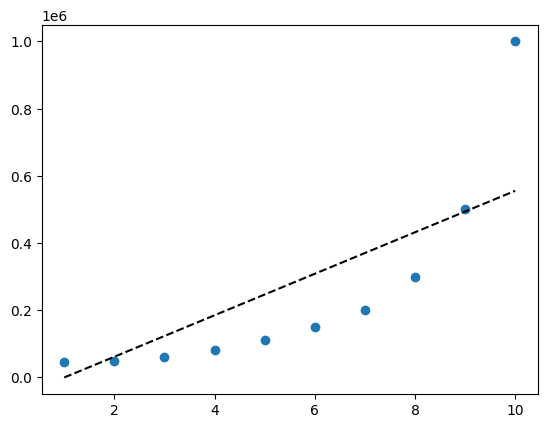

In [271]:
plt.scatter(X, y)
plt.plot(X, Linear_model.theta[1]*X + Linear_model.theta[0], '--k')
plt.show()

# Plynomial Regression

In [272]:
def create_polynomial_features(X, degree = 2):
    """ Creates the polynomial features
    Args:
        X: a array tensor for data
        degree: a integer for the degree of 
        the generated polynomial function
    """

    X_new = X
    for d in range(2, degree + 1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

In [273]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]], dtype=int64)

In [274]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [275]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=1000)
poly_model.fit()

Epoch: 0 - Loss: 142878966004.1624
Epoch: 1 - Loss: 45661190855.41245
Epoch: 2 - Loss: 22695836136.88524
Epoch: 3 - Loss: 17267985537.604397
Epoch: 4 - Loss: 15982279679.340458
Epoch: 5 - Loss: 15674900915.415384
Epoch: 6 - Loss: 15598594777.928558
Epoch: 7 - Loss: 15576869031.131521
Epoch: 8 - Loss: 15568038395.08839
Epoch: 9 - Loss: 15562257319.813324
Epoch: 10 - Loss: 15557200404.393274
Epoch: 11 - Loss: 15552318413.802118
Epoch: 12 - Loss: 15547481621.357708
Epoch: 13 - Loss: 15542659383.046951
Epoch: 14 - Loss: 15537844456.958023
Epoch: 15 - Loss: 15533035128.469486
Epoch: 16 - Loss: 15528230988.441803
Epoch: 17 - Loss: 15523431936.078522
Epoch: 18 - Loss: 15518637943.414516
Epoch: 19 - Loss: 15513848999.690975
Epoch: 20 - Loss: 15509065098.217478
Epoch: 21 - Loss: 15504286233.268997
Epoch: 22 - Loss: 15499512399.35296
Epoch: 23 - Loss: 15494743591.03617
Epoch: 24 - Loss: 15489979802.9039
Epoch: 25 - Loss: 15485221029.550262
Epoch: 26 - Loss: 15480467265.575861
Epoch: 27 - Loss: 1

{'loss': 14001010366.959734,
 'weight': array([ -2953.99399595, -15976.50287514,   9043.63831569])}

In [276]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8440999434151728

In [277]:
poly_model.theta


array([ -2953.99399595, -15976.50287514,   9043.63831569])

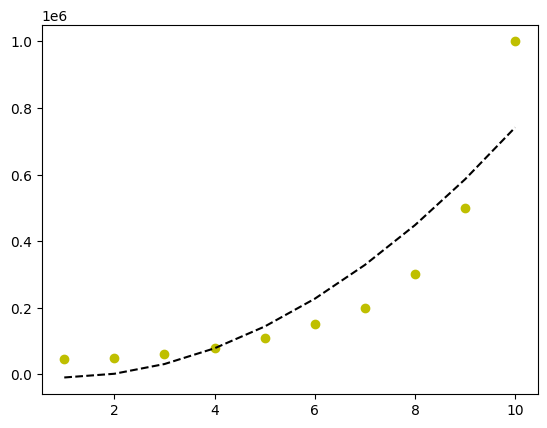

In [278]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()


# Sklearn

In [282]:
from sklearn.preprocessing import PolynomialFeatures

In [283]:
poly_feature = PolynomialFeatures(degree=2)

In [285]:
X.to_frame()

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [286]:
X_poly = poly_feature.fit_transform(X.to_frame())
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [287]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.00001, num_epochs=1000)
poly_model.fit()

Epoch: 0 - Loss: 142907480820.9598
Epoch: 1 - Loss: 130156485795.14389
Epoch: 2 - Loss: 118682577527.12749
Epoch: 3 - Loss: 108357843419.00346
Epoch: 4 - Loss: 99067182557.94476
Epoch: 5 - Loss: 90707022501.90587
Epoch: 6 - Loss: 83184164591.65977
Epoch: 7 - Loss: 76414744916.01387
Epoch: 8 - Loss: 70323299346.41878
Epoch: 9 - Loss: 64841922217.41329
Epoch: 10 - Loss: 59909509273.36792
Epoch: 11 - Loss: 55471076441.44163
Epoch: 12 - Loss: 51477146836.02238
Epoch: 13 - Loss: 47883199160.607605
Epoch: 14 - Loss: 44649171357.57694
Epoch: 15 - Loss: 41739013972.24541
Epoch: 16 - Loss: 39120288251.831055
Epoch: 17 - Loss: 36763804498.70192
Epoch: 18 - Loss: 34643296646.046715
Epoch: 19 - Loss: 32735129427.942543
Epoch: 20 - Loss: 31018034879.17569
Epoch: 21 - Loss: 29472875227.15623
Epoch: 22 - Loss: 28082429532.50305
Epoch: 23 - Loss: 26831201699.63997
Epoch: 24 - Loss: 25705247716.989407
Epoch: 25 - Loss: 24692020200.733257
Epoch: 26 - Loss: 23780228509.02113
Epoch: 27 - Loss: 22959712867

{'loss': 16641155306.85535,
 'weight': array([ -356.22955685, -1250.46080577,  7243.90644971])}

In [288]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.812275181971931

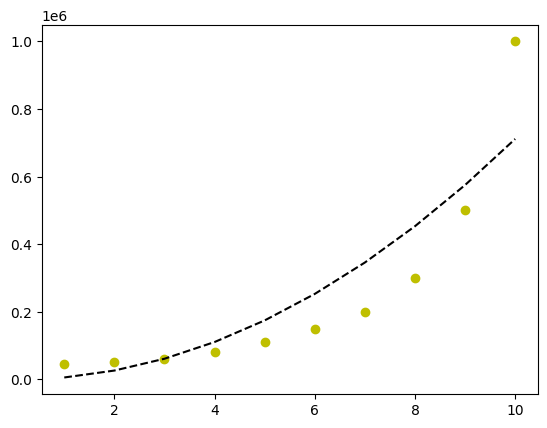

In [289]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

# Curve fit from scipy


In [290]:
from scipy import optimize

In [292]:
def func(x,a, b):
    y = a*np.exp(b*x)
    return y


In [294]:
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [295]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [296]:
alpha, beta = optimize.curve_fit(func, xdata= X, ydata=y)[0]
print(f'alpha={alpha}, beta={beta}')

alpha=4589.390851556285, beta=0.5346899447541074


In [297]:
y_pred = func(X, alpha, beta)

In [298]:
r2score(y_pred, y)

0.9808034598161927

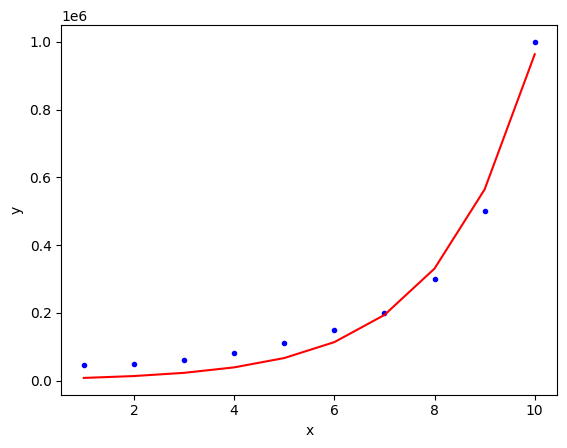

In [299]:
plt.plot(X, y, 'b.')
plt.plot(X, alpha*np.exp(beta*X), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()